In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self) -> None:
        super(LeNet,self).__init__(
        )
        # input 1개(원본) , output 6개, kernelsize 5^2
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)


    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x= F.max_pool2d(F.relu(self.conv2(x)),2)
        x= x.reshape(-1)
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        return x
    

In [2]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([ 0.0487, -0.0165,  0.1401,  0.0478,  0.1078, -0.0118, -0.0101,  0.0241,
        -0.0748, -0.1017], grad_fn=<ViewBackward0>)
torch.Size([10])


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  dog  bird   dog  frog


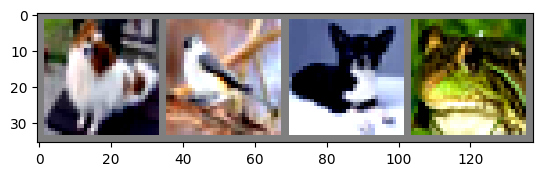

In [4]:
import matplotlib.pyplot as plt
import numpy as np

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset= torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [15]:
import torch.optim as optim
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = CustomNet()

criterion = nn.CrossEntropyLoss()

#모멘텀은 또 뭐임
optimizer = optim.Adam(net.parameters(),lr=0.001)


In [16]:
training_loss = 0.0
for i,data in enumerate(trainloader):
    inputs, labels = data

    optimizer.zero_grad()

    pred = net(inputs)
    loss = criterion(pred,labels)
    loss.backward()
    optimizer.step()

    training_loss+=loss.item()
    if i%2000==1999:
        print(f"{i}번째, loss : {training_loss/5000}")
        training_loss=0
print("fin")

1999번째, loss : 0.735402942097187
3999번째, loss : 0.644342488437891
5999번째, loss : 0.5974650244712829
7999번째, loss : 0.5726964699402451
9999번째, loss : 0.5568963924407959
11999번째, loss : 0.5374162429623306
fin


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) tensor([[0.1231, 0.1139, 0.1373, 0.1383],
        [0.1333, 0.1338, 0.1216, 0.1134],
        [0.1130, 0.1258, 0.0000, 0.0000]])
